In [37]:
#===========================IMPORT LIBRARIES===========================#

import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations
import pandas as pd # for data manipulation in dataframes
import matplotlib.colors as colors

import sklearn.metrics as metrics 

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes # for zoomed in plots
from mpl_toolkits.axes_grid1.inset_locator import mark_inset # for zoomed in plots

#===============SET PARAMETERS FOR CUSTOM PLOTTING====================#

# Set the inside ticks to be default
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

# Set font size of x and y labels to be 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set custom color cycle
custom_colors = [    
    '#0081C8',  # Olynmpic Blue
    '#EE334E',  # Olynmpic Red
    '#00A651',  # Olympic Green
    '#FCB131', # Olympic Yellow
    '#ba55d3',  # Medium Orchid
    '#00ced1',  # Dark Turquoise
    '#a89078', #Pastel brown
    '#e9967a',  # Dark Salmon
    '#66cdaa',   # Medium Aquamarine
    '#db7093'  # Pale Violet Red
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

In [39]:
#===========================fUNCTIONS===========================#

def load_zenith_results(file_path):
    results = pd.read_csv(file_path)
    true_zenith = results['zenith']
    predicted_zenith = results['zenith_pred']
    kappa = results['zenith_kappa']
    return true_zenith, predicted_zenith, kappa

def plot_angle_dist(true_labels, predicted_labels, kappa, name, save_path, kappa_mask=False):
    mask = kappa > 20

    if kappa_mask:
        true_labels = true_labels[mask]
        predicted_labels = predicted_labels[mask]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(true_labels, bins=100, range=(0, 3.145), histtype='step', label='True Zenith')
    ax.hist(predicted_labels, bins=100, range=(0, 3.145), histtype='step', label='Predicted Zenith')
    ax.set_xlabel('Zenith Angle (rad)')
    ax.set_ylabel('Counts')
    ax.legend()
    ax.set_yscale('log')

    if kappa_mask:
        plt.savefig(save_path + name + '/' + name + '_zenith_dist_kappa_mask.png', dpi=300)
    else:
        plt.savefig(save_path + name + '/' + name + '_zenith_dist.png', dpi=300)
    plt.show()

def plot_zenith_residual(true_labels, predicted_labels, kappa, name, save_path, kappa_mask=False):
    residual = predicted_labels - true_labels
    mask = kappa > 20

    if kappa_mask:
        residual = residual[mask]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(residual, bins=100, range=(-3, 3), histtype='step')
    ax.set_xlabel('Zenith Residual (rad)')
    ax.set_ylabel('Counts')

    if kappa_mask:
        plt.savefig(save_path + name + '/' + name + '_zenith_residual_kappa_mask.png', dpi=300)
    else:
        plt.savefig(save_path + name + '/' + name + '_zenith_residual.png', dpi=300)
    plt.show()

def plot_2D_true_vs_pred(true_labels, predicted_labels, kappa, name, save_path, kappa_mask=False):
    mask = kappa > 20
    bins_zenith_color = np.linspace(-0.1, 3.2, 100)

    if kappa_mask:
        true_labels = true_labels[mask]
        predicted_labels = predicted_labels[mask]

    fig, ax = plt.subplots(figsize=(10, 6))
    hist = ax.hist2d(predicted_labels, true_labels, bins=bins_zenith_color, norm=colors.LogNorm())
    ax.set_xlabel('Predicted Zenith Angle (rad)')
    ax.set_ylabel('True Zenith Angle (rad)')
    
    # Add a colorbar
    cbar = fig.colorbar(hist[3], ax=ax)
    cbar.set_label('Counts')

    perf_line = np.linspace(0, 3.1, 100)
    ax.plot(perf_line, perf_line, 'r--', label='Perfect Prediction')

    if kappa_mask:
        plt.savefig(save_path + name + '/' + name + '_zenith_2D_kappa_mask.png', dpi=300)
    else:
        plt.savefig(save_path + name + '/' + name + '_zenith_2D.png', dpi=300)
    plt.show()

In [40]:
validation_result_zenith = '/groups/icecube/luc/playground/Results_full_data/osc_next_level3_v2/dynedge_zenith_Luc_regression_LE_smalltest_validation_set/results_validation.csv'

true_zenith, predicted_zenith, kappa = load_zenith_results(validation_result_zenith)

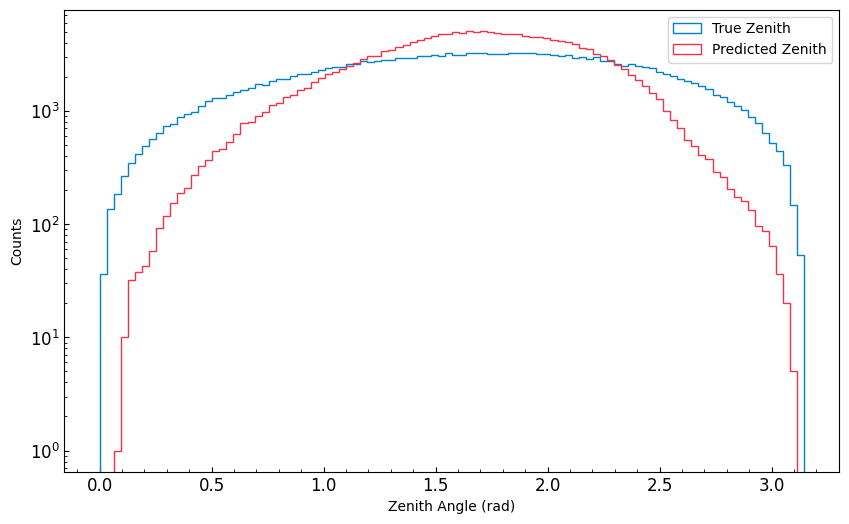

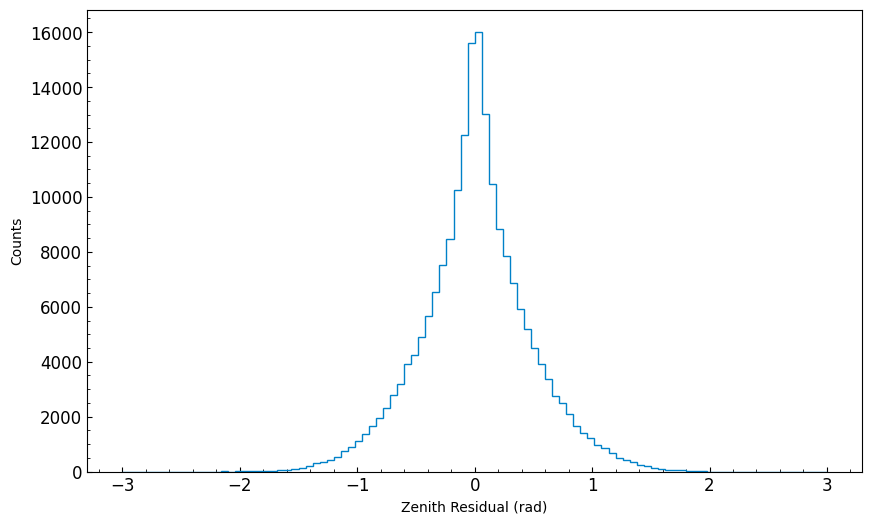

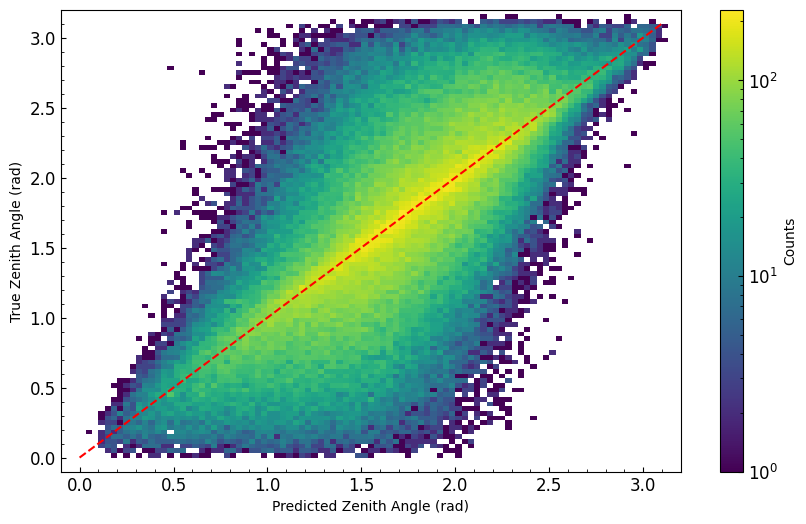

In [41]:
# Plot with kappa_mask = False
plot_angle_dist(true_zenith, predicted_zenith, kappa, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=False)
plot_zenith_residual(true_zenith, predicted_zenith, kappa, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=False)
plot_2D_true_vs_pred(true_zenith, predicted_zenith, kappa, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=False)

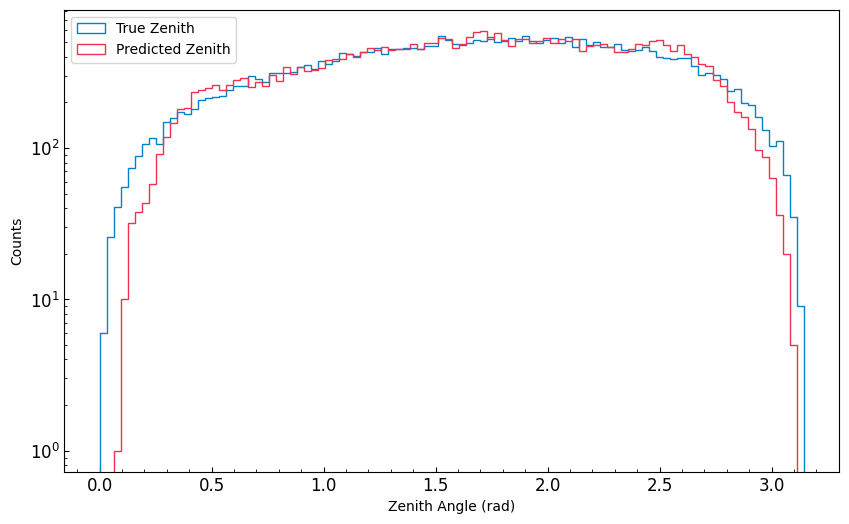

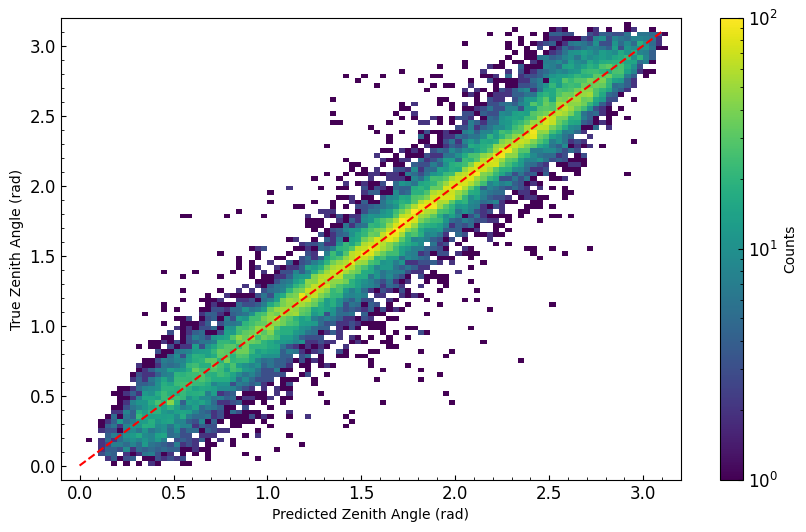

In [42]:
# Plot with kappa_mask = True
plot_angle_dist(true_zenith, predicted_zenith, kappa, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=True)
plot_2D_true_vs_pred(true_zenith, predicted_zenith, kappa, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_zenith_reconstruction/Plots/', kappa_mask=True)